# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import gmtime, strftime 
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#added for export do not know if needed
#import os
#import csv
#output_path=os.path("output_data", "cities.csv")

#Output File (CSV) from start file below
#output_data_file = ("output_data/cities.csv", header=True, Index=True

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities


641

In [36]:
url="https://api.openweathermap.org/data/2.5/weather?"
#units="imperial"

lat=[]
lng=[]
humidity=[]
max_temp=[]
city_id=[]
cloudiness=[]
country=[]
dt=[]
wind_speed=[]
city_name=[]

index_count=0
for each_city in cities[0:15]:
    each_city=each_city
    query_url = url + "&q=" + each_city + "&appid=" + weather_api_key + "&units=imperial"
    response = requests.get(query_url).json()

    try:
 
       #print([each_city])
       #print(f' )
       lat.append(response['coord']['lat'])
       #print(f'The latitude is {lat} for {each_city}  ')
       lng.append(response['coord']['lon'])
       #print(f'The Longitude is {lng} for {each_city} ')
       humidity.append(response['main']['humidity'])
       #print(f'The humidity is {humidity} for {each_city} ')
       max_temp.append(response['main']['temp_max'])
       #print(f'The max_temp is {max_temp} for {each_city} ')
       city_id.append(response['id'])
       #print(f'The city_id. is {city_id} for {each_city} ')
       city_name.append(response['name'])
       #print(f'The city_name is {city_name} for {each_city} ')
       cloudiness.append(response['clouds']['all'])
       #print(f'The cloudiness is {cloudiness} for {each_city} ') 
       country.append(response['sys']['country'])
       #print(f'The country is {country} for {each_city} ') 
       dt.append(response['dt'])
       #print(f'The date is {dt} for {each_city} ')  
       wind_speed.append(response['wind']['speed'])
       #print(f'The wind_speed is {wind_speed} for {each_city} ') 
       print(f'The city_id for {city_name[index_count]} is {city_id[index_count]}')
       index_count=index_count+1
    except KeyError:
             print("CITY NOT FOUND.")
            



The city_id for Ushuaia is 3833367
The city_id for Raymond is 4976361
The city_id for Sinnai is 6539309
The city_id for Nikolskoye is 546105
The city_id for San Cristobal is 3628473
The city_id for Busselton is 2075265
The city_id for Hailar is 2037078
The city_id for Mataura is 6201424
CITY NOT FOUND.
The city_id for Rikitea is 4030556
The city_id for Severo-Kuril'sk is 2121385
The city_id for Takoradze is 2294915
The city_id for Albany is 5106841
The city_id for Rome is 5134295
The city_id for Santa Isabel Rio Negro is 3662489


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
#Creates a DataFrame
weather_dict = {
    "City_Id": city_id,
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": dt,
    "Humidity": humidity,
    "Lat": lat,
    "lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data_df=pd.DataFrame(weather_dict)
weather_data_df.head()
weather_data_df.count()


#output_data_file = "output_data/city_output.csv"


City_Id       14
City          14
Cloudiness    14
Country       14
Date          14
Humidity      14
Lat           14
lng           14
Max Temp      14
Wind Speed    14
dtype: int64

In [38]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -0.4139, 'lon': -65.0192},
 'dt': 1611762530,
 'id': 3662489,
 'main': {'feels_like': 91.78,
          'grnd_level': 1006,
          'humidity': 52,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 88.11,
          'temp_max': 88.11,
          'temp_min': 88.11},
 'name': 'Santa Isabel Rio Negro',
 'sys': {'country': 'BR', 'sunrise': 1611743323, 'sunset': 1611787009},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 83, 'speed': 5.5}}


In [39]:

weather_data_df.to_csv("output_data/cities.csv", header=True, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
clean_city_data=weather_data_df.loc[weather_data_df['Humidity'] <= 100]
clean_city_data.count()

City_Id       14
City          14
Cloudiness    14
Country       14
Date          14
Humidity      14
Lat           14
lng           14
Max Temp      14
Wind Speed    14
dtype: int64

In [41]:
clean_city_data=clean_city_data.dropna(how='any')
clean_city_data.count()

City_Id       14
City          14
Cloudiness    14
Country       14
Date          14
Humidity      14
Lat           14
lng           14
Max Temp      14
Wind Speed    14
dtype: int64

In [42]:
#  Get the indices of cities that have humidity over 100%.



In [43]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [44]:

clean_city_data.columns

Index(['City_Id', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat',
       'lng', 'Max Temp', 'Wind Speed'],
      dtype='object')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [45]:
clean_city_data.head()


,City_Id,City,Cloudiness,Country,Date,Humidity,Lat,lng,Max Temp,Wind Speed
0,3833367,Ushuaia,75,AR,1611762306,70,-54.8000,-68.3000,44.60,16.11
1,4976361,Raymond,82,US,1611762526,94,43.9015,-70.4703,32.00,1.99
2,6539309,Sinnai,75,IT,1611762526,100,39.3042,9.2036,54.00,5.75
3,546105,Nikolskoye,40,RU,1611762526,86,59.7035,30.7861,33.80,4.47
4,3628473,San Cristobal,54,VE,1611762527,49,7.7669,-72.2250,78.15,7.90


In [51]:
plot_date=clean_city_data.loc[0, 'Date']
#plot_date=strftime("%A, %D %B %Y")
plot_date=strftime("%D")
print(plot_date)

01/27/21


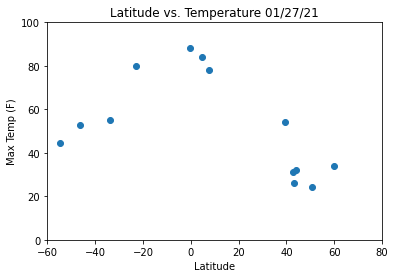

In [52]:


plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'Latitude vs. Temperature {plot_date}')
plt.show()

## Latitude vs. Humidity Plot

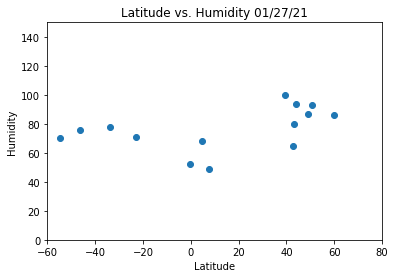

In [53]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.ylim(0, 150)
plt.xlim(-60, 80)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude vs. Humidity {plot_date}')
plt.show()

## Latitude vs. Cloudiness Plot

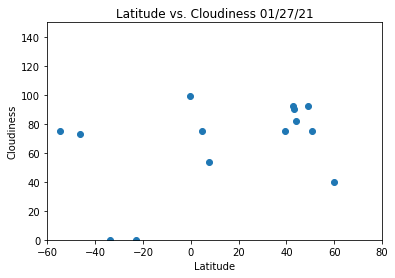

In [54]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.ylim(0, 150)
plt.xlim(-60, 80)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs. Cloudiness {plot_date}')
plt.show()

## Latitude vs. Wind Speed Plot

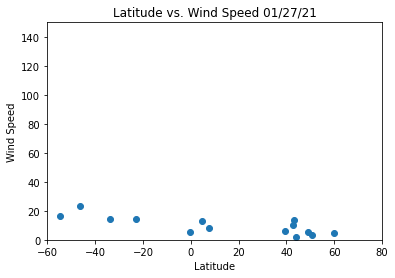

In [55]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.ylim(0, 150)
plt.xlim(-60, 80)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Latitude vs. Wind Speed {plot_date}')
plt.show()

## Linear Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# x_values = weight_avg
# y_values = tumor_vol_avg
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Average Weight')
# plt.ylabel('Average Tumor Volume')
# plt.ylim(32, 47)
# plt.xlim(14, 26)
# #plt.title('Avg Weight/Avg Tumor Volume for Capomulin Regimen')
# plt.title(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment {round(sts.pearsonr(x_values,y_values)[0],2)}")
# plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression